In [1]:
#QUESTION
#Can I predict what is the rank of the core players (AKA Pos 1 (Carry), Pos 2 (Mid), Pos 3(Offlane))?
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample1.csv")
df


/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (3,5,7,14,16,18,19,20,21,22,25,29,31,34,43,44,45,46,48,49,53,54,55,56,58,59,60,64,67,68,69,70,74,75,76,77,78,82,86,87,110,129,130,131,132,133) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Index,match_id,player_slot,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,additional_units,assists,...,is_roaming,purchase_time,first_purchase_time,item_win,item_usage,purchase_ward_observer,purchase_ward_sentry,purchase_tpscroll,actions_per_min,life_state_dead
0,0,6929068396,0,NaN,"[5249, 631, 5250, 631, 631, 5252, 631, 5250, 5...",NaN,NaN,NaN,NaN,10,...,0,0,0,0,0,0,0,0,0,0
1,1,6929068396,1,NaN,"[5625, 5623, 5625, 5626, 5625, 5630, 5625, 562...",NaN,155457665.0,NaN,NaN,29,...,0,0,0,0,0,0,0,0,0,0
2,2,6929068396,2,NaN,"[5069, 5071, 5069, 5072, 5069, 5073, 5069, 507...",NaN,NaN,NaN,NaN,25,...,0,0,0,0,0,0,0,0,0,0
3,3,6929068396,3,NaN,"[5134, 5136, 5134, 7325, 5134, 5137, 7325, 513...",NaN,NaN,NaN,NaN,23,...,0,0,0,0,0,0,0,0,0,0
4,4,6929068396,4,NaN,"[5075, 5076, 5076, 5074, 5076, 5077, 5076, 507...",NaN,155216493.0,NaN,NaN,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,6929071651,128,NaN,"[5075, 5076, 5076, 5075, 5076, 5077, 5075, 507...",NaN,105965457.0,NaN,NaN,3,...,0,0,0,0,0,0,0,0,0,0
10196,10196,6929071651,129,NaN,"[5362, 5361, 5362, 5363, 5361, 5364, 5362, 536...",NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0
10197,10197,6929071651,130,NaN,"[7322, 5566, 5565, 7322, 7322, 5568, 7322, 556...",NaN,NaN,NaN,NaN,3,...,0,0,0,0,0,0,0,0,0,0
10198,10198,6929071651,131,NaN,"[5581, 5582, 5581, 5582, 5581, 5584, 5583, 558...",NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#We can see that there are many dubious columns with "nan" as all of their values. Such columns should be removed.
#There are also columns that do not really help us with our question (irrelevant), such as match_id, account_id
#There are also columns that are hard to understand,such as ability_upgrades_arr (too many unique values).
#Each hero has different abilities and hence would not make sense to use it as a comparison with other heroes
#This also applies to items (backpack_0, item_0 etc.)
#There are also columns that are very related to each other (gold and gold_per_min, win and lose) 
#We should keep the better metric and remove the other as they may cause multicollinearity.

#Since there are so many variables to remove, we can instead pick out the columns we need
df = df[["assists","deaths", "denies","gold_per_min", "hero_damage", "hero_healing",
         "hero_id","kills","last_hits","leaver_status","tower_damage","xp_per_min",
         "duration","win","kills_per_min","kda","abandons","rank_tier"]]
df


,assists,deaths,denies,gold_per_min,hero_damage,hero_healing,hero_id,kills,last_hits,leaver_status,tower_damage,xp_per_min,duration,win,kills_per_min,kda,abandons,rank_tier
0,10,3,34,669,27483,216,54,16,259,0.0,18888,813,2299,1,0.417573,6,0,NaN
1,29,4,4,357,21638,4316,110,3,78,0.0,854,579,2299,1,0.078295,6,0,54.0
2,25,4,20,533,35062,0,13,11,181,0.0,3094,899,2299,1,0.287081,7,0,NaN
3,23,10,4,418,16734,0,31,8,71,0.0,1262,576,2299,1,0.208786,2,0,NaN
4,16,8,14,584,18224,0,14,13,221,0.0,3142,745,2299,1,0.339278,3,0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,3,6,2,404,5529,0,14,1,30,0.0,0,1506,1445,0,0.041522,0,0,NaN
10196,2,7,3,563,7638,0,72,2,45,0.0,248,1654,1445,0,0.083045,0,0,NaN
10197,3,9,3,973,22923,0,100,9,45,0.0,0,1945,1445,0,0.373702,1,0,NaN
10198,1,9,6,688,17304,0,101,4,49,0.0,233,1425,1445,0,0.166090,0,0,NaN


In [4]:
#Since our goal is to predict the rank of the core players, if the player data 
#does not have the rank of the player, then that data is useless, we can delete that row
df = df.dropna()
df



,assists,deaths,denies,gold_per_min,hero_damage,hero_healing,hero_id,kills,last_hits,leaver_status,tower_damage,xp_per_min,duration,win,kills_per_min,kda,abandons,rank_tier
1,29,4,4,357,21638,4316,110,3,78,0.0,854,579,2299,1,0.078295,6,0,54.0
4,16,8,14,584,18224,0,14,13,221,0.0,3142,745,2299,1,0.339278,3,0,63.0
5,16,13,6,325,25403,0,100,6,63,0.0,0,575,2299,0,0.156590,1,0,55.0
6,12,9,2,234,16217,195,123,2,29,0.0,0,332,2299,0,0.052197,1,0,61.0
7,7,11,8,440,16151,0,74,8,168,0.0,1084,527,2299,0,0.208786,1,0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,10,4,7,1424,20061,0,114,11,96,0.0,4763,1816,1373,1,0.480699,4,0,32.0
10190,16,1,5,1181,25463,0,32,16,46,0.0,1519,2098,1445,1,0.664360,16,0,41.0
10191,7,8,3,706,9604,0,68,5,22,0.0,1576,1657,1445,1,0.207612,1,0,33.0
10192,15,6,6,887,7931,0,75,3,43,0.0,1857,1626,1445,1,0.124567,2,0,54.0


In [5]:
#We should remove rows that have 1 as their value for "abandons" columns
#It would not be accurate to use that in our model as the player did not play the full match
#Same for leaver_status
df = df[df['abandons'] != 1]
df = df[df['leaver_status'] != 1]


#Also, the "kda" column seems to be inaccurate
df['kda'] = (df['kills'] + df['assists']) / df['deaths'].where(df['deaths'] != 0, 1)

#As an experienced player with 2.2k hours, I am confident that the distribution of ranks below is fair for the average player:
rank = {1:"Low",
        2:"Low",
        3:"Low",
        4:"Low",
        5:"Mid",
        6:"Mid",
        7:"High",
        8:"High"}
df["rank"] = ""
df['rank'] = df['rank_tier'].apply(lambda x: rank[int(x/10)])


#Additionally ,we should change the data to only core players
#We can do this by removing hero_id that are not core heroes
#Note that if a player is a Core player, it does not mean that he is carry player
#However, all core heroes have the "Carry" role under them
#Hence by selecing only data whose heroes have the "Carry" role, majority of the data we get would be from core players,
#With the exception being flexible hereos who can be played as support despite being a core hero.
#They will be handled later when we remove outliers

Hero_data = pd.read_csv("sample2.csv")        
Hero_data = Hero_data[Hero_data["hero_role"].str.contains("Carry")] 
df = df[df["hero_id"].isin(Hero_data["hero_id"])]


df


,assists,deaths,denies,gold_per_min,hero_damage,hero_healing,hero_id,kills,last_hits,leaver_status,tower_damage,xp_per_min,duration,win,kills_per_min,kda,abandons,rank_tier,rank
7,7,11,8,440,16151,0,74,8,168,0.0,1084,527,2299,0,0.208786,1.363636,0,61.0,Mid
16,9,8,9,282,13553,0,71,4,107,0.0,81,408,2614,0,0.091813,1.625000,0,22.0,Low
18,8,9,14,473,15945,0,114,6,292,0.0,305,598,2614,0,0.137720,1.555556,0,15.0,Low
20,2,5,4,308,7707,0,12,2,128,0.0,0,405,1848,0,0.064935,0.800000,0,31.0,Low
22,3,3,8,385,12216,0,46,4,159,0.0,1550,473,1848,0,0.129870,2.333333,0,31.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,6,3,1,1161,13636,8023,8,4,98,0.0,8603,1653,1373,1,0.174800,3.333333,0,15.0,Low
10188,10,4,7,1424,20061,0,114,11,96,0.0,4763,1816,1373,1,0.480699,5.250000,0,32.0,Low
10190,16,1,5,1181,25463,0,32,16,46,0.0,1519,2098,1445,1,0.664360,32.000000,0,41.0,Low
10192,15,6,6,887,7931,0,75,3,43,0.0,1857,1626,1445,1,0.124567,3.000000,0,54.0,Mid


In [6]:
#Since the longer the game goes, the more things you can do throughout the game, We should change metrics such as kills, death, assists, last_hits to per minute.
#e.g. 

df["kpm"] = df['kills'] * 60 / df['duration']
df["dpm"] = df['deaths'] * 60 / df['duration']
df["apm"] = df['assists'] * 60 / df['duration']
df["lhpm"] = df['last_hits'] * 60 / df['duration']
df["healpm"] =  df['hero_healing'] * 60 / df['duration']

#remove
df = df.drop(['kills', 'deaths', 'assists', 'last_hits', 'hero_healing'], axis=1)


In [7]:
#Since in the game of dota, metrics such as GPM and XPM would vary significantly between a win and a lose,
#it would make sense to split up the data into win and lose


#Split Data to win and lose
df_win = df[df["win"]==1]
df_lose = df[df["win"]==0]

In [8]:
#remove outliers
variables = ["denies","gold_per_min","hero_damage","healpm","tower_damage","xp_per_min","kills_per_min","kda", "kpm","dpm","apm","lhpm",]
def remove_outliers_within_category(data, column, target_column):
    groups = data.groupby(target_column)
    def remove_outliers(group):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)
        group = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        return group
    df = groups.apply(remove_outliers)
    df = df.reset_index(drop=True)
    return df

for var in variables:
    df_win = remove_outliers_within_category(df_win, var, 'rank')
    df_lose = remove_outliers_within_category(df_lose, var, 'rank')


In [9]:
# Now lets check which variable is correlated to our target ("rank")
# We can do this by using Analysis Of Variance (ANOVA)
# Lets take a level of significance of 10% which means we are willing to accept a 10% chance of an error or we are 90% confident of our result
import scipy.stats as stats
target_col = 'rank' 
anova_win_results = {}
anova_lose_results = {}
for col in df.columns:
    if col != target_col:
        category_groups_w = [df_win[df_win[target_col] == category][col] for category in df_win[target_col].unique()]
        f_val_w, p_val_w = stats.f_oneway(*category_groups_w)
        anova_win_results[col] = {'F-statistic': f_val_w, 'p-value': p_val_w}
        category_groups_l = [df_lose[df_lose[target_col] == category][col] for category in df_lose[target_col].unique()]
        f_val_l, p_val_l = stats.f_oneway(*category_groups_l)
        anova_lose_results[col] = {'F-statistic': f_val_l, 'p-value': p_val_l}
anova_win_df = pd.DataFrame(anova_win_results).T
anova_win_df = anova_win_df[anova_win_df['p-value'] <= 0.05]
anova_lose_df = pd.DataFrame(anova_lose_results).T
anova_lose_df = anova_lose_df[anova_lose_df['p-value'] <= 0.10]
anova_win_df



/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3906: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,F-statistic,p-value
gold_per_min,6.178763,2.191056e-03
xp_per_min,13.396522,1.965621e-06
kda,7.478962,6.124710e-04
rank_tier,729.469549,4.840724e-170
dpm,8.087159,3.379494e-04
lhpm,11.924964,8.122295e-06


In [10]:
anova_lose_df

,F-statistic,p-value
gold_per_min,8.661457,1.978793e-04
hero_damage,4.714562,9.329207e-03
tower_damage,2.721060,6.669097e-02
xp_per_min,17.244547,5.447862e-08
rank_tier,698.835475,9.615088e-152
dpm,4.357445,1.325629e-02
lhpm,9.983715,5.507806e-05
healpm,34.755698,6.111981e-15


In [11]:
variables = anova_win_df.index.tolist()
variables.append('rank')
variables.append('win')
df_win = df_win.loc[:, df_win.columns.isin(variables)]
variables = anova_lose_df.index.tolist()
variables.append('rank')
variables.append('win')
df_lose = df_lose.loc[:, df_lose.columns.isin(variables)]

[Text(0.6538461538461539, 0.9, 'kda <= 13.5\ngini = 0.379\nsamples = 547\nvalue = [31, 419, 97]\nclass = Mid'),
 Text(0.5769230769230769, 0.7, 'xp_per_min <= 1044.0\ngini = 0.369\nsamples = 541\nvalue = [31, 419, 91]\nclass = Mid'),
 Text(0.3076923076923077, 0.5, 'lhpm <= 7.379\ngini = 0.419\nsamples = 435\nvalue = [31, 319, 85]\nclass = Mid'),
 Text(0.15384615384615385, 0.3, 'lhpm <= 1.31\ngini = 0.36\nsamples = 318\nvalue = [15, 248, 55]\nclass = Mid'),
 Text(0.07692307692307693, 0.1, 'gini = 0.653\nsamples = 7\nvalue = [2, 2, 3]\nclass = High'),
 Text(0.23076923076923078, 0.1, 'gini = 0.345\nsamples = 311\nvalue = [13, 246, 52]\nclass = Mid'),
 Text(0.46153846153846156, 0.3, 'xp_per_min <= 698.5\ngini = 0.547\nsamples = 117\nvalue = [16, 71, 30]\nclass = Mid'),
 Text(0.38461538461538464, 0.1, 'gini = 0.594\nsamples = 8\nvalue = [4, 1, 3]\nclass = Low'),
 Text(0.5384615384615384, 0.1, 'gini = 0.514\nsamples = 109\nvalue = [12, 70, 27]\nclass = Mid'),
 Text(0.8461538461538461, 0.5, 'x

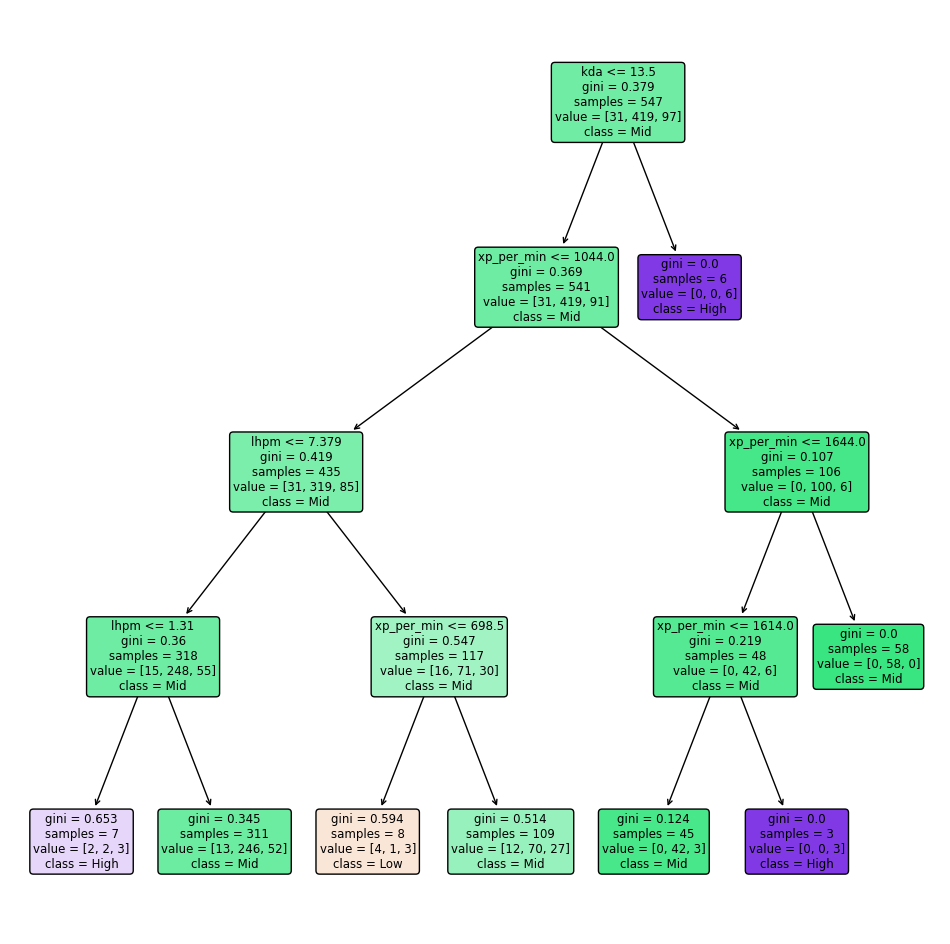

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
tree = DecisionTreeClassifier(max_depth = 4)
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


y = df_win["rank"]
df_win = df_win.drop('rank_tier', axis=1)
X = df_win.drop('rank', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
tree.fit(X_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, rounded=True, 
          feature_names = X_train.columns, 
          class_names=["Low","Mid","High"])

Test Data
Accuracy  :	 0.708029197080292

TPR Test :	 1.0
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.0


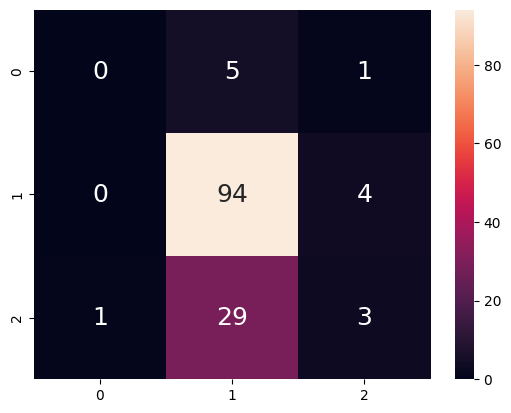

In [13]:
y_test_pred = tree.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
print("Test Data")
print("Accuracy  :\t", tree.score(X_test, y_test))
print()

# Confusion matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

[Text(0.75, 0.9, 'xp_per_min <= 981.0\ngini = 0.357\nsamples = 442\nvalue = [22, 346, 74]\nclass = Mid'),
 Text(0.625, 0.7, 'healpm <= 0.872\ngini = 0.415\nsamples = 361\nvalue = [22, 265, 74]\nclass = Mid'),
 Text(0.5, 0.5, 'hero_damage <= 10552.0\ngini = 0.403\nsamples = 357\nvalue = [18, 265, 74]\nclass = Mid'),
 Text(0.25, 0.3, 'xp_per_min <= 662.5\ngini = 0.533\nsamples = 57\nvalue = [3, 32, 22]\nclass = Mid'),
 Text(0.125, 0.1, 'gini = 0.517\nsamples = 53\nvalue = [3, 32, 18]\nclass = Mid'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = High'),
 Text(0.75, 0.3, 'tower_damage <= 1349.0\ngini = 0.364\nsamples = 300\nvalue = [15, 233, 52]\nclass = Mid'),
 Text(0.625, 0.1, 'gini = 0.403\nsamples = 251\nvalue = [15, 187, 49]\nclass = Mid'),
 Text(0.875, 0.1, 'gini = 0.115\nsamples = 49\nvalue = [0, 46, 3]\nclass = Mid'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Low'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 81\nvalue = [0, 81, 0]\

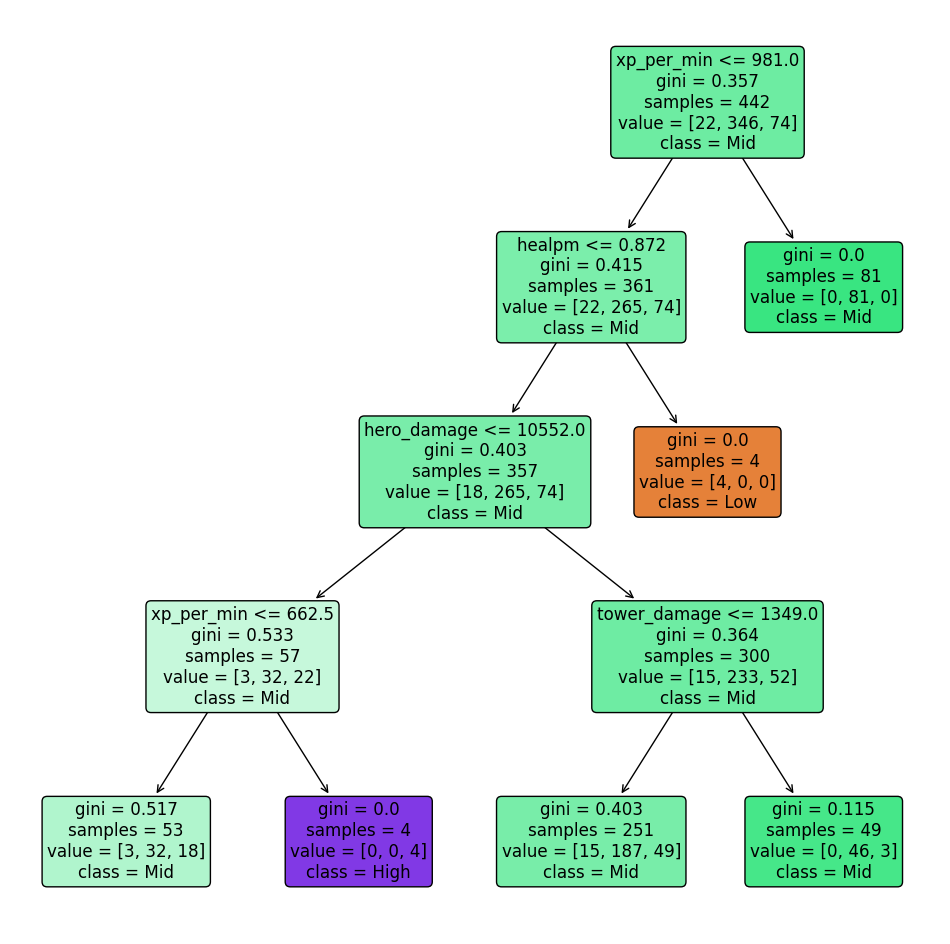

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
tree = DecisionTreeClassifier(max_depth = 4)
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


y = df_lose["rank"]
df_lose = df_lose.drop('rank_tier', axis=1)
X = df_lose.drop('rank', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
tree.fit(X_train, y_train)


f = plt.figure(figsize=(12,12))
plot_tree(tree, filled=True, rounded=True, 
          feature_names = X_train.columns, 
          class_names=["Low","Mid","High"])



Test Data
Accuracy  :	 0.7477477477477478

TPR Test :	 1.0
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.0


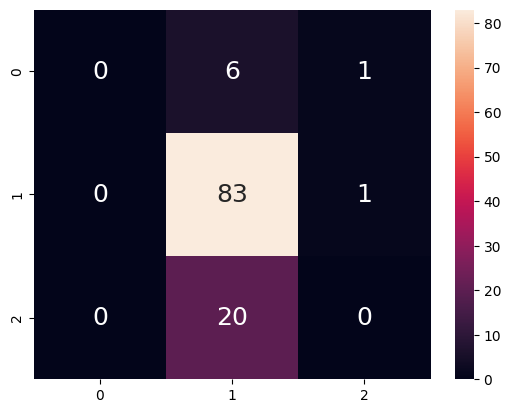

In [15]:
y_test_pred = tree.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
print("Test Data")
print("Accuracy  :\t", tree.score(X_test, y_test))
print()

#confusion matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

So we have created 2 models, one for win and one for lose.
Win model has an accuracy of 70.8% and lose model has an accuracy of 74.8% of guessing the correct rank.
We have created a rather accurate model


Let's take a look back at the variables that made this decistion trees and see what we can learn from them


For win:
The variables are:
gold_per_min (gold per minute) (Higher the better)
xp_per_min (Experience per minute) (Higher the better)
kda (Kill Death Assist Ratio) (Higher the better)
dpm (deaths per minute) (Lower the better)
lhpm (last hits per minute) (Higher the better)



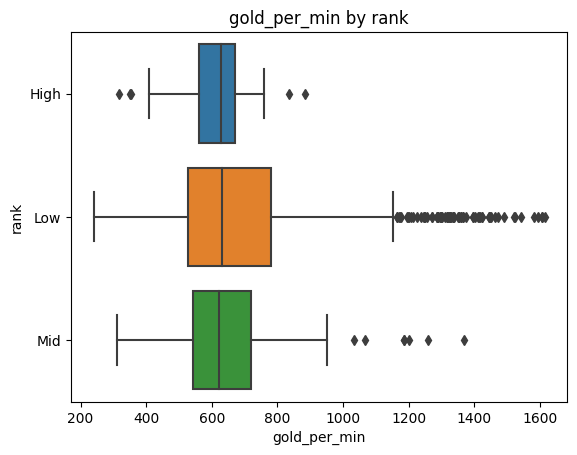

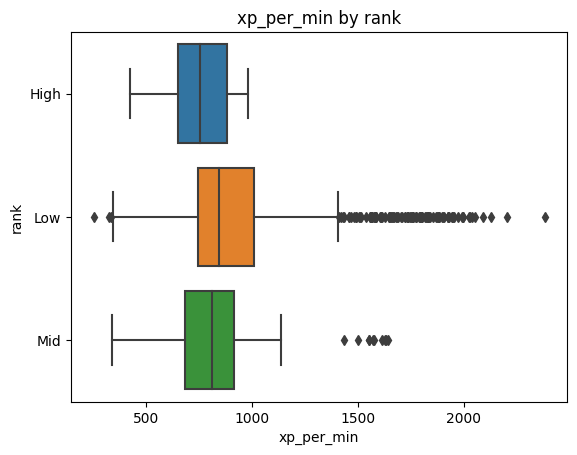

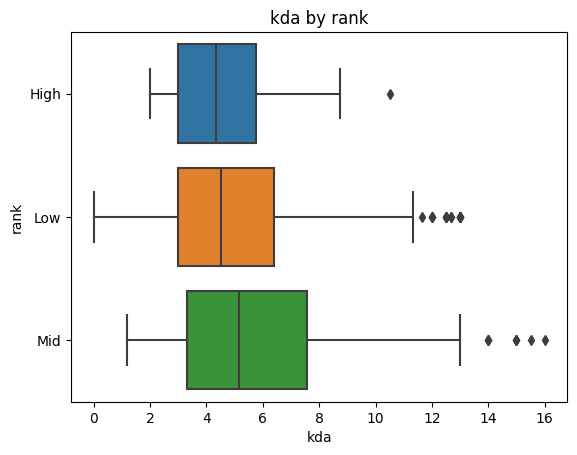

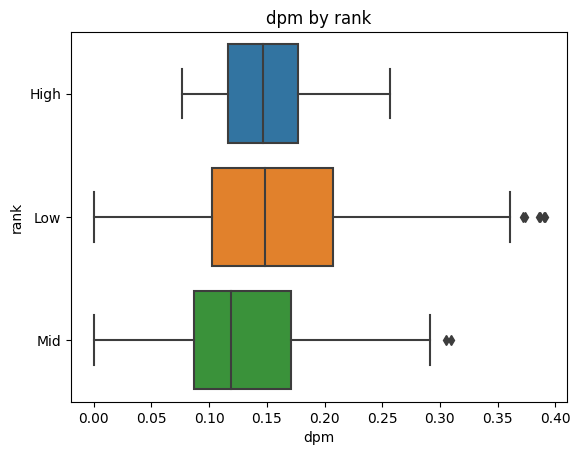

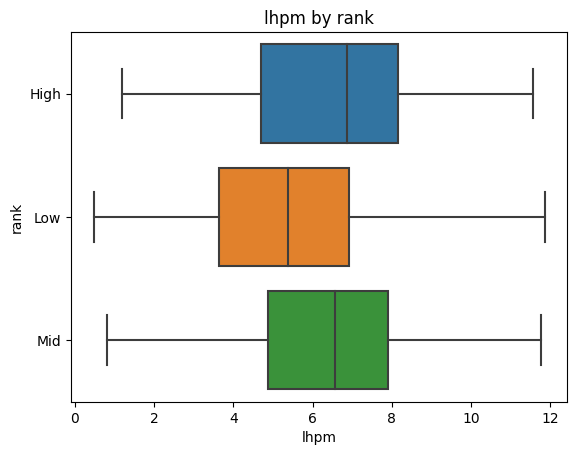

In [16]:
variables = ["gold_per_min", "xp_per_min", "kda", "dpm","lhpm"]
for var in variables: 
    sb.boxplot(x=var, y='rank', data = df_win)
    plt.title(var+' by rank')
    plt.xlabel(var)
    plt.ylabel('rank')
    plt.show()

We can see that if one is low rank and wants to get to the mid rank, he can improve his lhpm by learning farming patterns or last hit better in lane. For kda and deaths per minute, he can perhaps learn how to tell which is a good fight or learn how to farm safely by having map awareness.



We can also see that besides kda and deaths per minute, most of the variables for mid and high rank are similar. High rank players actually have more deaths but higher kda than mid rank players. This suggets that maybe high rank players take higher risks and participate in fights more than mid rank players, or that the playstyle of high rank players are more fast-paced with more fights occuring rather than farming for the late. Mid rank players can learn to farm aggressively and try to fight more, rather than farming passively in the jungle for extended periods of time. Mid rank players could also pick faster-paced heroes. Another possible reason for this is that KDA is calculated by summing both kills and assists. If a greater number of teamfights occur with mutiple players getting assists, this can increase KDA even with the same or less number of kills if low rank players mainly play by themselves and get "solo-kills".

For lose:
The variables are:
gold_per_min (gold per minute) (Higher the better)
hero_damage (Higher the better)
hero_healing (Depends on the hero)
tower_damage (Higher the better)
xp_per_min (Experience per minute) (Higher the better)
dpm (deaths per minute) (Lower the better)
lhpm (last hits per minute) (Higher the better)



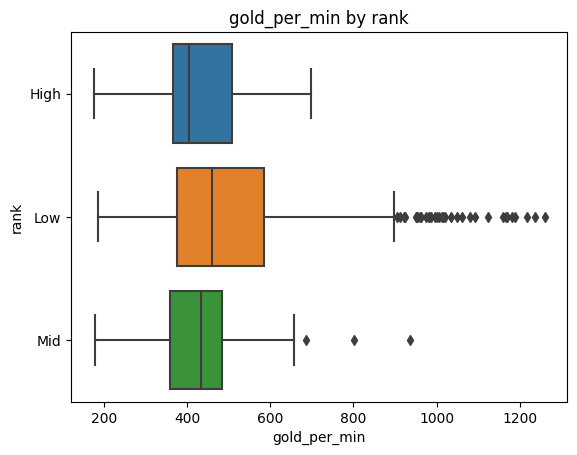

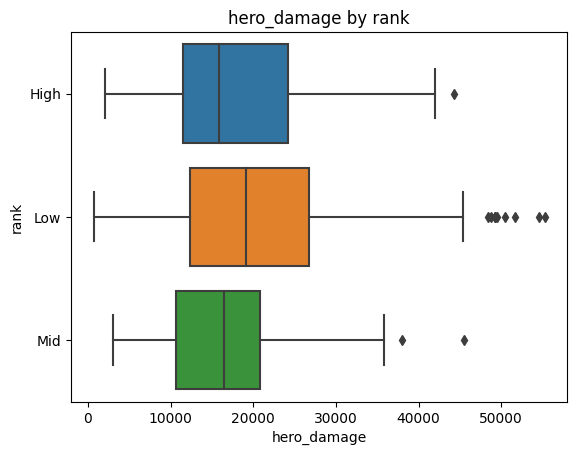

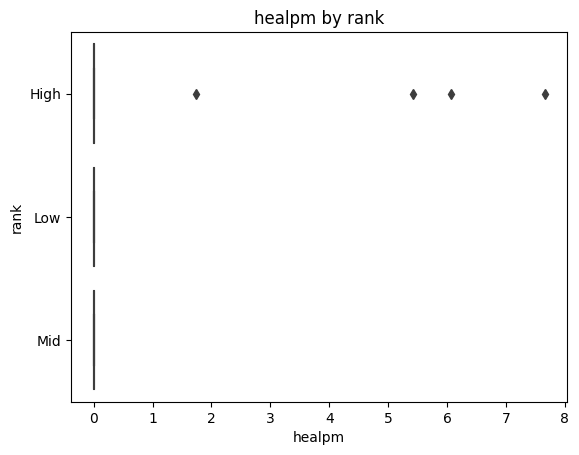

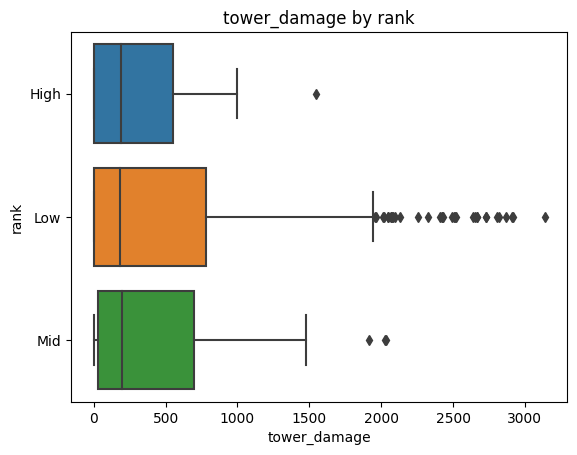

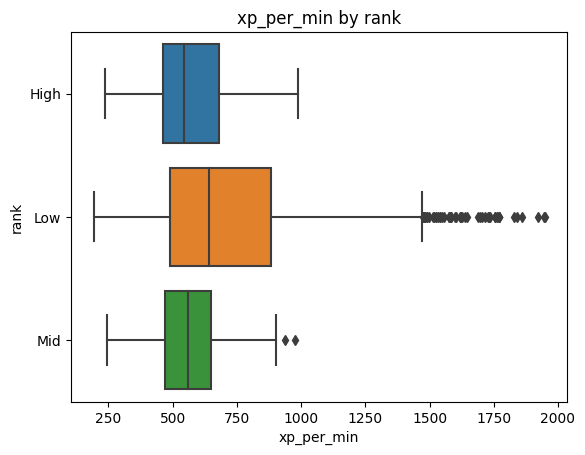

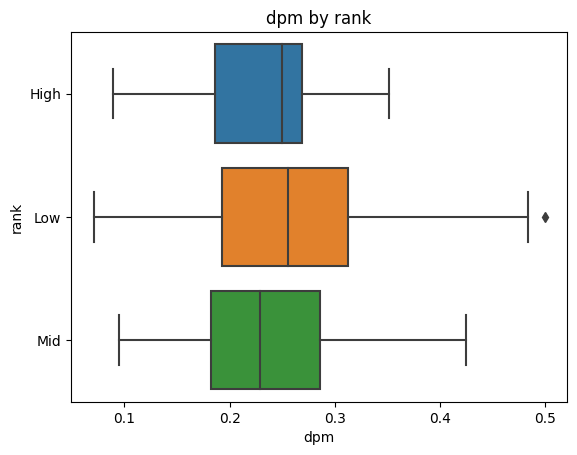

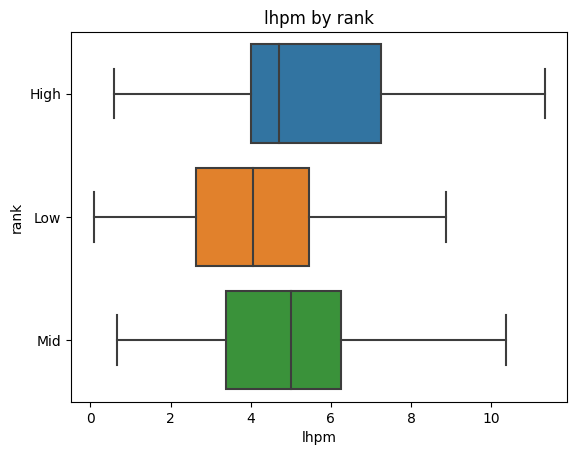

In [17]:
variables = ["gold_per_min","hero_damage","healpm","tower_damage","xp_per_min", "dpm","lhpm"]
for var in variables: 
    sb.boxplot(x=var, y='rank', data = df_lose)
    plt.title(var+' by rank')
    plt.xlabel(var)
    plt.ylabel('rank')
    plt.show()


It is interesting to note that low rank players actually have higher gpm, hero damage and xp per minute, which means that low rank players are able to farm and fight properly, however they fail to win the game. They can perhaps learn how to better take advantage of the map. For example, after winning a fight, instead of retreating back into your jungle to farm, they can stay in enemy terriority and take away their farm, causing a gold swing in their favour.

As we can see from comparing last hits, kills and gold, we can see that even though low tier players have more gold available to them, they have less last hits and more kills. This suggests that as players improve, they become skillful enough to avoid dying as much. This may pose a challenge for low tier players as they try to improve if they fail to adapt to a new climate. They should avoid going for risky kills as it is more likely that higher ranked players can punish mistakes.


When comparing between wins and losses, we can observe that in wins, there is quite a similar median amount of gold at 600 gpm. However, in losses, high tier players have a average of 400 gpm compared to 450 gpm in low tier. Thus, losses are more severe in high ranks compared to low ranks.  Low rank players thus should understand that they will be given less room to breathe as they ranks improve. Thus, it is vital that they should avoid finding themselves in a losing position at the start of the game. 


<font size ="5">Overall</font>

From this project, we have learned how to get data from websites using API calls. We have also applied data science concepts like data cleaning, removing outliers, finding correlation between numerical variables and categorical data as well as using AI machine learning to make our prediction model.

With the models we have created, our results largely tally with our initial predictions. Low rank players are behind in most metrics, as expected. Generally to improve as a core player, we should learn how to pick good fights better, how to farm more efficiently and also having better map awareness to avoid deaths while not sacrificing the objectives. Additionally, based on the few anomalous data points, the meta appears to favour more fast-paced heroes that are strong and fight early on rather than heroes that farm and drag to the late game. We should also look to drfat heroes that can fight together as a team instead of playing the game alone. Finally, we should avoid high-variance heroes and focus on those that can deliver consistently. 

Also, the models we created can be improved. If we had access to other metrics such as item usage, micromanagement controls, decision making and how many times they look at the map, we can build a better prediction model.

If we had support metrics such as lane pressure, ward placement, wards placed, wards dewarded and abilities casted etc., we can also build a model for the supports.


In fact, looking at each metric individually, there is a clear trend that in low rank games, in wins and in losses, the variance of the metric is higher compared to high rank games. From this, we can conclude that low rank games are more chaotic and random. This can largely due to the fact low rank players do not really understand their actions which causes luck to have a big impact on their performance. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=50b9d36f-bb4a-4ccb-ba85-992b73a4ccd2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>